In [1]:
pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


This block  imports the required Python libraries for data analysis and visualization  including pandas, numpy, matplotlib, seaborn, and datetime. It also suppresses warning messages and sets Pandas display options for easier viewing of full tables and long column names.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)  

This block reads four CSV files  the BTS airline performance data, airport geographic data, weather records, and Skytrax airline reviews  into separate Pandas DataFrames. It prints the number of rows and columns in each dataset to confirm successful loading and ensures all data sources are available for later merging.

In [5]:
# Load BTS Delay Data
bts = pd.read_csv('FilteredData/Airline_Delay_Cause.csv')
print(f"   ✓ Loaded: {len(bts):,} rows, {len(bts.columns)} columns")

# Load Airport Geographic Data
airports = pd.read_csv('data/airports_geographic.csv')
print(f"   ✓ Loaded: {len(airports):,} rows, {len(airports.columns)} columns")

# Load Weather Data
weather = pd.read_csv('data/weather_all_airports.csv')
print(f"   ✓ Loaded: {len(weather):,} rows, {len(weather.columns)} columns")

# Load Skytrax Reviews
reviews = pd.read_csv('data/skytrax_airline_reviews.csv')
print(f"   ✓ Loaded: {len(reviews):,} rows, {len(reviews.columns)} columns")

print("\nAl  datasets loaded successfully!")
print()


   ✓ Loaded: 44,353 rows, 21 columns
   ✓ Loaded: 83,798 rows, 19 columns
   ✓ Loaded: 1,811,324 rows, 15 columns
   ✓ Loaded: 41,396 rows, 20 columns

Al  datasets loaded successfully!



This block explores the BTS dataset by printing its column names, first few rows, data types, and summary statistics. The purpose is to understand what variables are available (e.g., delays, cancellations, etc.) and detect potential data quality issues such as missing values or incorrect types.

In [6]:
#BTS DATA

print("\nColumn names:")
print(bts.columns.tolist())

print("\nFirst 5 rows:")
print(bts.head())

print("\nData types:")
print(bts.dtypes)

print("\nBasic statistics:")
print(bts.describe())



Column names:
['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

First 5 rows:
   year  month carrier        carrier_name airport                                                         airport_name  arr_flights  arr_del15  carrier_ct  weather_ct  nas_ct  security_ct  late_aircraft_ct  arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  security_delay  late_aircraft_delay
0  2025      7      YV  Mesa Airlines Inc.     BWI  Baltimore, MD: Baltimore/Washington International Thurgood Marshall         18.0        2.0        1.43        0.00    0.57          0.0              0.00            0.0           0.0       44.0           32.0            0.0       12.0             0.0                  0.0
1  2025      

Similar to the BTS inspection, this block displays column names, data types, sample rows, and descriptive statistics for the airport, weather, and review datasets. This helps verify that each dataset has the necessary columns and clean formats before integration.

In [7]:
# Airports Data
print("\nColumn names:")
print(airports.columns.tolist())

print("\nFirst 5 rows:")
print(airports.head())

print("\nData types:")
print(airports.dtypes)

print("\nBasic statistics:")
print(airports.describe())



Column names:
['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg', 'elevation_ft', 'continent', 'iso_country', 'iso_region', 'municipality', 'scheduled_service', 'icao_code', 'iata_code', 'gps_code', 'local_code', 'home_link', 'wikipedia_link', 'keywords']

First 5 rows:
       id ident           type                  name  latitude_deg  longitude_deg  elevation_ft continent iso_country iso_region  municipality scheduled_service icao_code iata_code gps_code local_code                                                                       home_link wikipedia_link keywords
0    6523   00A       heliport     Total RF Heliport     40.070985     -74.933689          11.0       NaN          US      US-PA      Bensalem                no       NaN       NaN     K00A        00A  https://www.penndot.pa.gov/TravelInPA/airports-pa/Pages/Total-RF-Heliport.aspx            NaN      NaN
1  323361  00AA  small_airport  Aero B Ranch Airport     38.704022    -101.473911        3435.0       NaN

In [8]:
# Weather Data
print("\nColumn names:")
print(weather.columns.tolist())

print("\nFirst 5 rows:")
print(weather.head())

print("\nData types:")
print(weather.dtypes)

print("\nBasic statistics:")
print(weather.describe())



Column names:
['station', 'valid', 'lon', 'lat', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'vsby', 'gust', 'skyc1', 'skyc2', 'feel']

First 5 rows:
  station             valid       lon      lat   tmpf   dwpf   relh    drct  sknt p01i   vsby gust skyc1 skyc2   feel
0     ATL  2023-01-01 00:00  -84.4418  33.6301      M      M      M  190.00  4.00    M  10.00    M   BKN     M      M
1     DFW  2023-01-01 00:00  -97.0380  32.8968  65.00  44.00  46.47  180.00  7.00    M      M    M     M     M  65.00
2     JFK  2023-01-01 00:00  -73.7622  40.6386      M      M      M    0.00  0.00    M   0.25    M   VV      M      M
3     DEN  2023-01-01 00:00 -104.6575  39.8328      M      M      M  140.00  9.00    M  10.00    M   CLR     M      M
4     DFW  2023-01-01 00:00  -97.0380  32.8968      M      M      M  180.00  8.00    M  10.00    M   CLR     M      M

Data types:
station     object
valid       object
lon        float64
lat        float64
tmpf        object
dwpf        object
relh      

In [9]:
# Reviews Data
print("\nColumn names:")
print(reviews.columns.tolist())

print("\nFirst 5 rows:")
print(reviews.head())

print("\nData types:")
print(reviews.dtypes)

print("\nBasic statistics:")
print(reviews.describe())


Column names:
['airline_name', 'link', 'title', 'author', 'author_country', 'date', 'content', 'aircraft', 'type_traveller', 'cabin_flown', 'route', 'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating', 'food_beverages_rating', 'inflight_entertainment_rating', 'ground_service_rating', 'wifi_connectivity_rating', 'value_money_rating', 'recommended']

First 5 rows:
    airline_name                            link                          title        author author_country        date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Here, the script standardizes text fields (airport, carrier) by stripping spaces and converting them to uppercase. It also creates a date column by combining year and month, checks for missing values, and prepares a list of numeric columns where missing values will be imputed.

In [10]:
# Clean BTS Data
bts['airport'] = bts['airport'].str.strip().str.upper()
bts['carrier'] = bts['carrier'].str.strip().str.upper()

# Create a date column from year and month
bts['date'] = pd.to_datetime(bts[['year', 'month']].assign(day=1))

# Check for missing values
print("\nMissing values:")
print(bts.isnull().sum())



Missing values:
year                    0
month                   0
carrier                 0
carrier_name            0
airport                 0
airport_name            0
arr_flights            19
arr_del15              62
carrier_ct             19
weather_ct             19
nas_ct                 19
security_ct            19
late_aircraft_ct       19
arr_cancelled          19
arr_diverted           19
arr_delay              19
carrier_delay          19
weather_delay          19
nas_delay              19
security_delay         19
late_aircraft_delay    19
date                    0
dtype: int64


This block fills missing numeric values in flight and delay-related columns with their respective column means. The step ensures the dataset is complete and avoids errors during statistical analysis or visualizations.

In [14]:
#Fix the missing values in the BTS Data
cols_to_fill = [
    'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
    'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
    'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
    'security_delay', 'late_aircraft_delay'
]

# Fill missing values with column mean
for col in cols_to_fill:
    mean_value = bts[col].mean()
    bts[col].fillna(mean_value, inplace=True)

# Verify missing values handled
print(bts[cols_to_fill].isna().sum())


arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64


The code cleans the airport table by standardizing airport codes and filtering only U.S. airports. It also processes the weather dataset by cleaning station IDs, converting date columns to datetime format, and extracting the date for easier merging and temporal alignment.

In [15]:
# Clean Airports Data
airports['iata_code'] = airports['iata_code'].str.strip().str.upper()
us_airports = airports[airports['iso_country'] == 'US'].copy()

# Clean Weather Data
weather['station'] = weather['station'].str.strip().str.upper()
weather['valid'] = pd.to_datetime(weather['valid'])
weather['date_only'] = weather['valid'].dt.date


# Airline mapping (name to code)
airline_mapping = {
    'american-airlines': 'AA',
    'delta-air-lines': 'DL',
    'united-airlines': 'UA',
    'southwest-airlines': 'WN',
    'alaska-airlines': 'AS',
    'jetblue-airways': 'B6',
    'spirit-airlines': 'NK',
    'frontier-airlines': 'F9',
    'allegiant-air': 'G4',
    'hawaiian-airlines': 'HA',
}

reviews['carrier_code'] = reviews['airline_name'].map(airline_mapping)
reviews['date_flown'] = pd.to_datetime(reviews['date'], errors='coerce')



This code block visualizes the average delay by cause using a bar chart created with Matplotlib. It saves the plot as an image (analysis_delay_causes.png) and helps identify which operational areas (e.g., carrier, weather, air traffic) contribute most to delays.

           arr_delay  carrier_delay  weather_delay      nas_delay  security_delay  late_aircraft_delay
count  409612.000000  409612.000000  409612.000000  409612.000000   409612.000000        409612.000000
mean     4218.975002    1324.919900     228.574708    1034.045357        7.148976          1624.278981
std     12965.798316    3902.608752     909.022229    4359.241419       39.125330          5242.696918
min         0.000000       0.000000       0.000000     -19.000000        0.000000             0.000000
25%       409.000000     135.000000       0.000000      50.000000        0.000000            77.000000
50%      1154.000000     413.000000      23.000000     185.000000        0.000000           348.000000
75%      3016.000000    1088.000000     160.000000     562.000000        0.000000          1111.000000
max    648300.000000  321792.000000   64550.000000  238440.000000     3760.000000        279153.000000

 TOP 10 AIRPORTS BY AVERAGE ARRIVAL DELAY:
airport  airport_name        

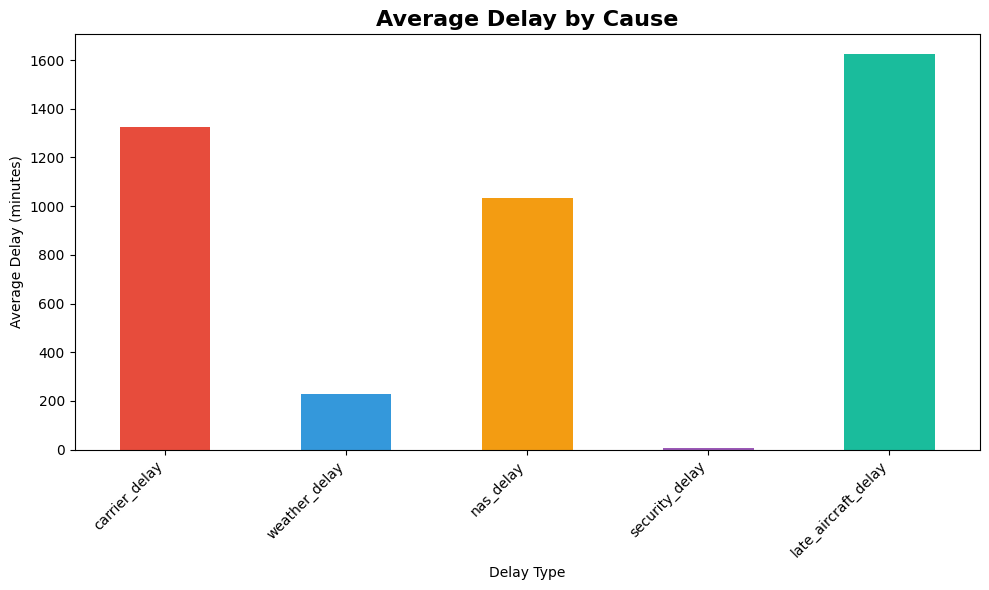


 BTS analysis complete!



In [29]:

delay_cols = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 
              'security_delay', 'late_aircraft_delay']
print(bts[delay_cols].describe())

# Top airports by delay
print("\n TOP 10 AIRPORTS BY AVERAGE ARRIVAL DELAY:")
top_airports = bts.groupby(['airport', 'airport_name'])['arr_delay'].mean().sort_values(ascending=False).head(10)
print(top_airports)

# Top carriers by delay
print("\n AVERAGE DELAY BY CARRIER:")
carrier_delays = bts.groupby(['carrier', 'carrier_name'])['arr_delay'].mean().sort_values(ascending=False)
print(carrier_delays)

# Delay breakdown by cause
print("\n AVERAGE DELAY BY CAUSE (minutes):")
delay_causes = bts[['carrier_delay', 'weather_delay', 'nas_delay', 
                     'security_delay', 'late_aircraft_delay']].mean()
print(delay_causes)

# Total delays by cause
print("\n TOTAL DELAY MINUTES BY CAUSE:")
total_delays = bts[['carrier_delay', 'weather_delay', 'nas_delay', 
                     'security_delay', 'late_aircraft_delay']].sum()
print(total_delays)

# Flight counts
print("\n FLIGHT STATISTICS:")
print(f"Total flights: {bts['arr_flights'].sum():,}")
print(f"Total delayed (>15 min): {bts['arr_del15'].sum():,}")
print(f"Total cancelled: {bts['arr_cancelled'].sum():,}")
print(f"Total diverted: {bts['arr_diverted'].sum():,}")
delay_rate = (bts['arr_del15'].sum() / bts['arr_flights'].sum()) * 100
print(f"Delay rate: {delay_rate:.1f}%")

# Plot: Delay causes
plt.figure(figsize=(10, 6))
delay_causes.plot(kind='bar', color=['#e74c3c', '#3498db', '#f39c12', '#9b59b6', '#1abc9c'])
plt.title('Average Delay by Cause', fontsize=16, fontweight='bold')
plt.xlabel('Delay Type')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('analysis_delay_causes.png', dpi=150, bbox_inches='tight')
print("\n✓ Saved: analysis_delay_causes.png")
plt.show()
plt.close()

print("\n BTS analysis complete!")
print()



The script computes average monthly delay trends over time and visualizes them with a line plot. This helps identify long-term delay patterns, seasonal spikes, or improvements in airline punctuality.


 AVERAGE DELAY BY MONTH:
date
2015-01-01    11917.459805
2015-02-01    12652.533981
2015-03-01    12402.597215
2015-04-01    10583.539216
2015-05-01    12397.452459
                  ...     
2025-03-01    16578.297297
2025-04-01    16187.639889
2025-05-01    21392.096685
2025-06-01    25302.404826
2025-07-01    28730.413699
Name: arr_delay, Length: 127, dtype: float64


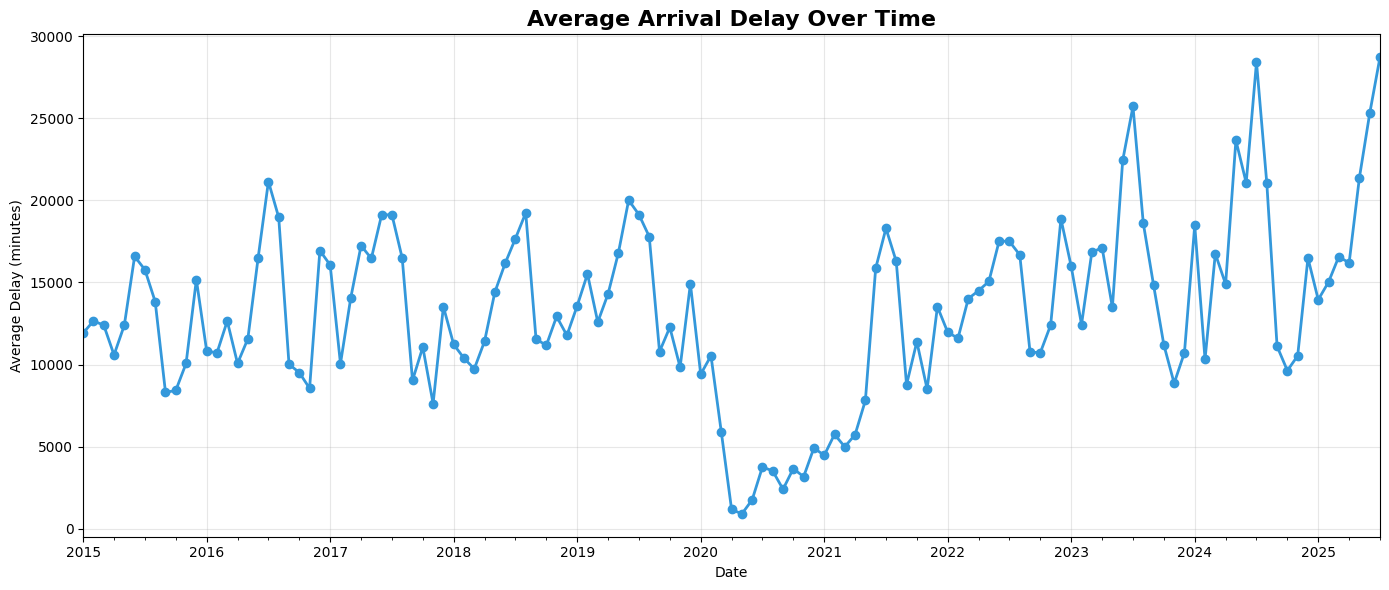


 Saved: analysis_monthly_trend.png

 AVERAGE DELAY BY MONTH OF YEAR:
month
7     19729.650446
6     17739.817847
8     16397.217994
5     14138.829404
12    13583.953990
1     12467.215326
3     12283.727870
4     12072.161267
2     11406.031697
10     9993.301471
9      9869.404593
11     9373.318653
Name: arr_delay, dtype: float64

 Trend analysis complete!



In [16]:


# Average delay by month
print("\n AVERAGE DELAY BY MONTH:")
monthly_delay = bts.groupby('date')['arr_delay'].mean().sort_index()
print(monthly_delay)

# Plot monthly trend
plt.figure(figsize=(14, 6))
monthly_delay.plot(color='#3498db', linewidth=2, marker='o')
plt.title('Average Arrival Delay Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Average Delay (minutes)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('analysis_monthly_trend.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n Saved: analysis_monthly_trend.png")
plt.close()

# Which months have worst delays?
print("\n AVERAGE DELAY BY MONTH OF YEAR:")
seasonal = bts.groupby('month')['arr_delay'].mean().sort_values(ascending=False)
print(seasonal)

print("\n Trend analysis complete!")
print()


Here, the BTS dataset is merged with the cleaned U.S. airport data using the airport code as the key. The merged table gains latitude, longitude, and elevation attributes, enabling geographic mapping and regional delay analysis. The block also identifies airports without coordinate matches.

In [17]:
print(" MERGING BTS + AIRPORTS")

# Merge BTS with Airports
merged_geo = bts.merge(
    us_airports[['iata_code', 'name', 'latitude_deg', 'longitude_deg', 
                 'elevation_ft', 'type']],
    left_on='airport',
    right_on='iata_code',
    how='left'
)

# Rename for clarity
merged_geo = merged_geo.rename(columns={
    'name': 'airport_full_name',
    'latitude_deg': 'lat',
    'longitude_deg': 'lon',
    'elevation_ft': 'elevation',
    'type': 'airport_type'
})

print(f"\n✓ Merged dataset: {len(merged_geo):,} rows")
print(f"   Matched: {merged_geo['lat'].notna().sum():,}")
print(f"   Not matched: {merged_geo['lat'].isna().sum():,}")

# Show sample
print(merged_geo[['airport', 'airport_name', 'lat', 'lon', 
                   'elevation', 'arr_delay']].head())

# Check unmatched airports
unmatched = merged_geo[merged_geo['lat'].isna()]['airport'].unique()
if len(unmatched) > 0:
    print(f"\n⚠️ Unmatched airports ({len(unmatched)}):")
    print(unmatched[:10])

print("\n Geographic merge complete!")


 MERGING BTS + AIRPORTS

✓ Merged dataset: 44,353 rows
   Matched: 44,353
   Not matched: 0
  airport                                                         airport_name        lat        lon  elevation  arr_delay
0     BWI  Baltimore, MD: Baltimore/Washington International Thurgood Marshall  39.175400 -76.668297      146.0       44.0
1     CLT                       Charlotte, NC: Charlotte Douglas International  35.214001 -80.943100      748.0     2264.0
2     DFW               Dallas/Fort Worth, TX: Dallas/Fort Worth International  32.896801 -97.038002      607.0     2125.0
3     DTW                              Detroit, MI: Detroit Metro Wayne County  42.213770 -83.353786      645.0     3785.0
4     IAD                      Washington, DC: Washington Dulles International  38.944500 -77.455803      312.0    23417.0

 Geographic merge complete!


This block produces a bar chart of the top 10 airports with the highest average delays using Matplotlib. It provides a clear visual summary of which airports are most affected by delays nationwide.

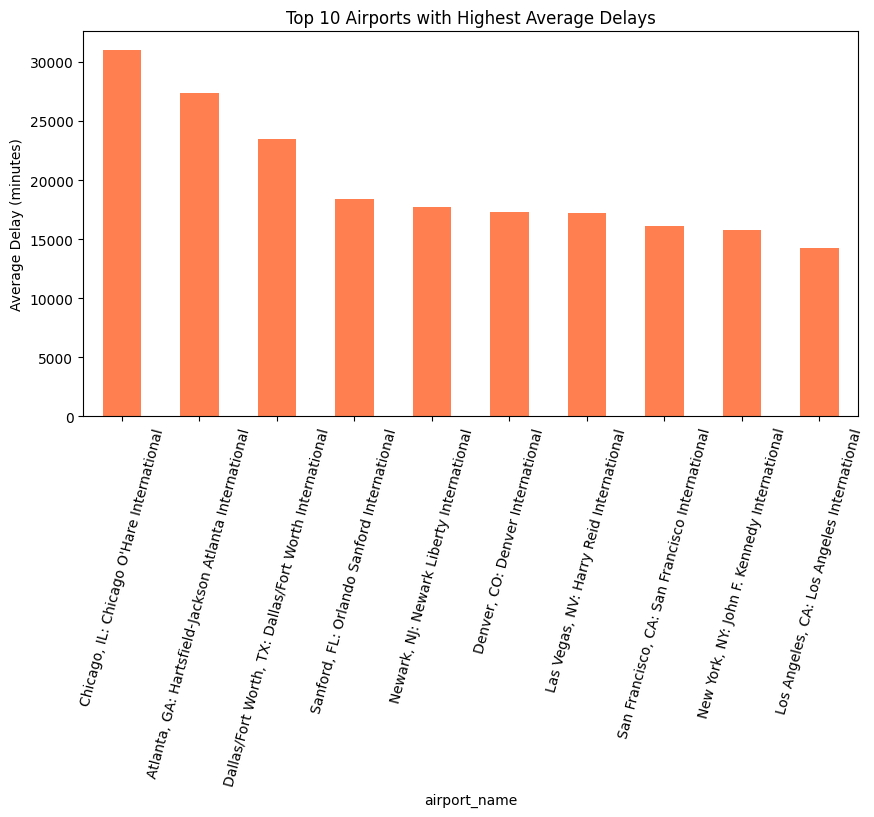

In [39]:
top_airports = (bts.groupby('airport_name')['arr_delay']
                .mean()
                .sort_values(ascending=False)
                .head(10))

top_airports.plot(kind='bar', figsize=(10,5), color='coral')
plt.title('Top 10 Airports with Highest Average Delays')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=75)
plt.show()
